In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import pandas_ta as ta
warnings.filterwarnings('ignore')

In [6]:
# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-09-27")
tesla_data.to_csv('tesla_stock_data.csv')



[*********************100%***********************]  1 of 1 completed


In [29]:
tesla_data= pd.read_csv("C:/Users/ajays/OneDrive/Documents/I-Neuron Intern/notebook/tesla_stock_data.csv")

In [30]:
# Check for any missing values
missing_values = tesla_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
print(tesla_data.describe())


              Open         High          Low        Close    Adj Close  \
count  3586.000000  3586.000000  3586.000000  3586.000000  3586.000000   
mean     77.153159    78.844979    75.356826    77.137136    77.137136   
std     103.102020   105.391371   100.618212   103.032724   103.032724   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.755000    12.033833    11.445500    11.822833    11.822833   
50%      17.590667    17.828000    17.325000    17.587999    17.587999   
75%     170.015003   174.500000   167.090000   170.787502   170.787502   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.586000e+03  
mean   9.676517e+07  
std    7.826239e+07  
min    1.777500e+06  
25%    4.829400e+07  
50%    8.203705e+07  
75%    1.225153e+08  
max    9.140820e+08  


### Time series for the closing price to observe general trends (e.g., upward/downward trends over time).

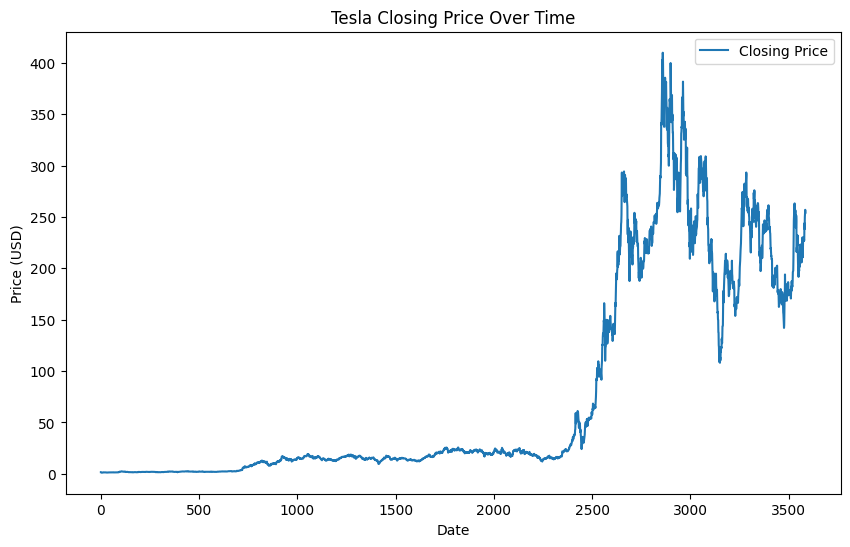

In [32]:

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'], label='Closing Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Visualize the volume of trades over time

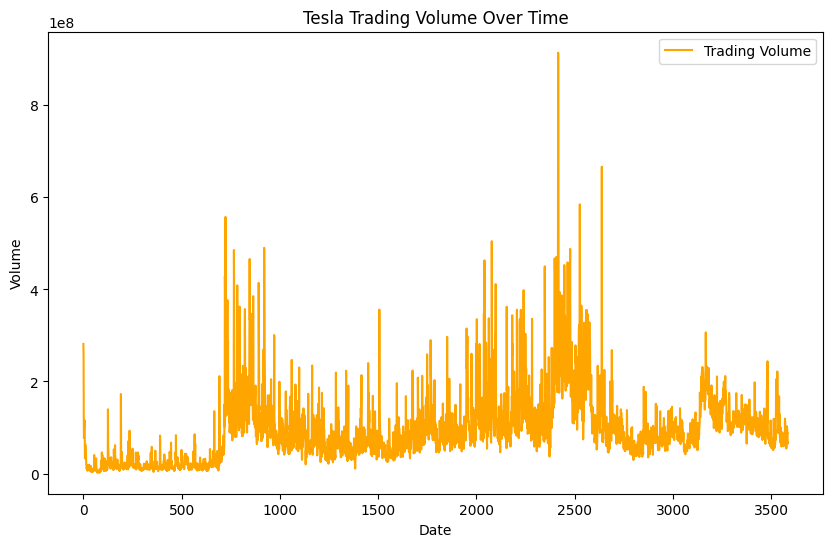

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df['Volume'], label='Trading Volume', color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [50]:
# Add technical indicators

import pandas_ta as ta

# Calculate the 20-day and 50-day Moving Averages
tesla_data['MA20'] = ta.sma(tesla_data['Close'], length=20)
tesla_data['MA50'] = ta.sma(tesla_data['Close'], length=50)

# Calculate RSI (Relative Strength Index)
tesla_data['RSI'] = ta.rsi(tesla_data['Close'], length=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd = ta.macd(tesla_data['Close'])
tesla_data['MACD'] = macd['MACD_12_26_9']
tesla_data['Signal Line'] = macd['MACDs_12_26_9']

# Drop any rows with NaN values
tesla_data.dropna(inplace=True)

# Display the first few rows to check if the columns are correctly added
print(tesla_data[['MA20', 'MA50', 'RSI', 'MACD', 'Signal Line']].head())


         MA20      MA50        RSI      MACD  Signal Line
249  1.873533  1.822333  50.849166 -0.007900     0.001621
250  1.867167  1.825853  50.040894 -0.006686    -0.000041
251  1.860200  1.828947  49.376770 -0.006244    -0.001281
252  1.853433  1.832320  53.319342 -0.002370    -0.001499
253  1.852667  1.836667  54.378951  0.001650    -0.000869


In [35]:
bb = ta.bbands(tesla_data['Close'], length=20)
print(bb.columns)  # This will show you the actual column names


Index(['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0'], dtype='object')


In [36]:
# Assuming the correct column names returned are 'BBL_20_2.0', 'BBM_20_2.0', and 'BBU_20_2.0'
tesla_data['BB_upper'] = bb[bb.columns[2]]  # Upper Bollinger Band
tesla_data['BB_middle'] = bb[bb.columns[1]]  # Middle Bollinger Band (Moving Average)
tesla_data['BB_lower'] = bb[bb.columns[0]]  # Lower Bollinger Band


In [37]:
tesla_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50',
       'RSI', 'BB_upper', 'BB_middle', 'BB_lower'],
      dtype='object')

### Rolling Statistics

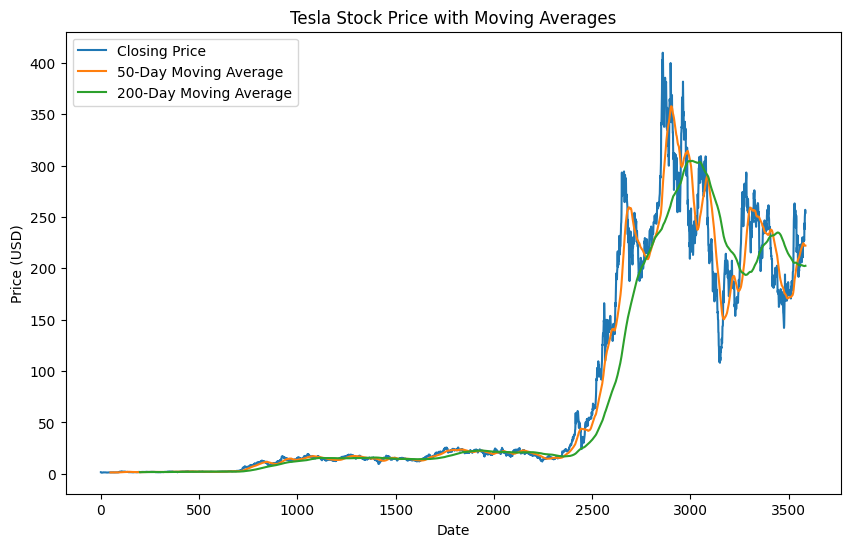

In [38]:
tesla_data['50_MA'] = tesla_data['Close'].rolling(window=50).mean()
tesla_data['200_MA'] = tesla_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Close'], label='Closing Price')
plt.plot(tesla_data['50_MA'], label='50-Day Moving Average')
plt.plot(tesla_data['200_MA'], label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### Volatility Analysis

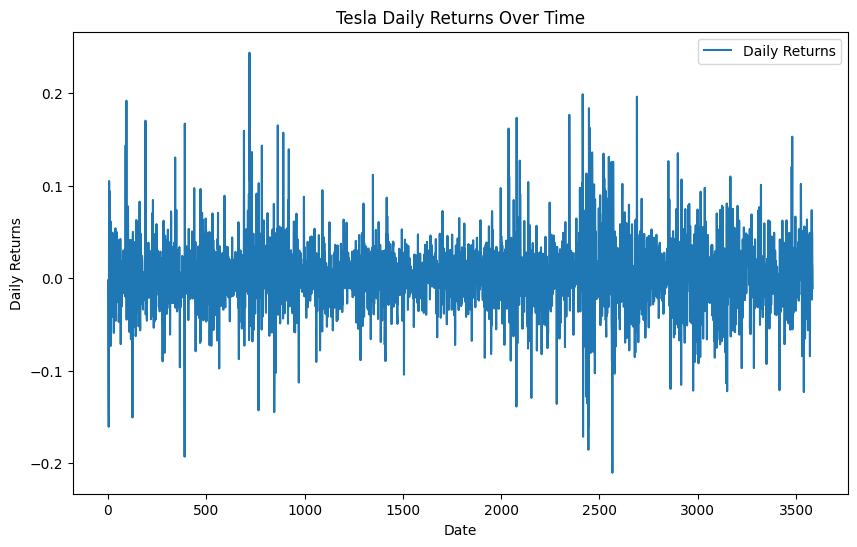

In [39]:
tesla_data['Daily_Returns'] = tesla_data['Close'].pct_change()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Daily_Returns'], label='Daily Returns')
plt.title('Tesla Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

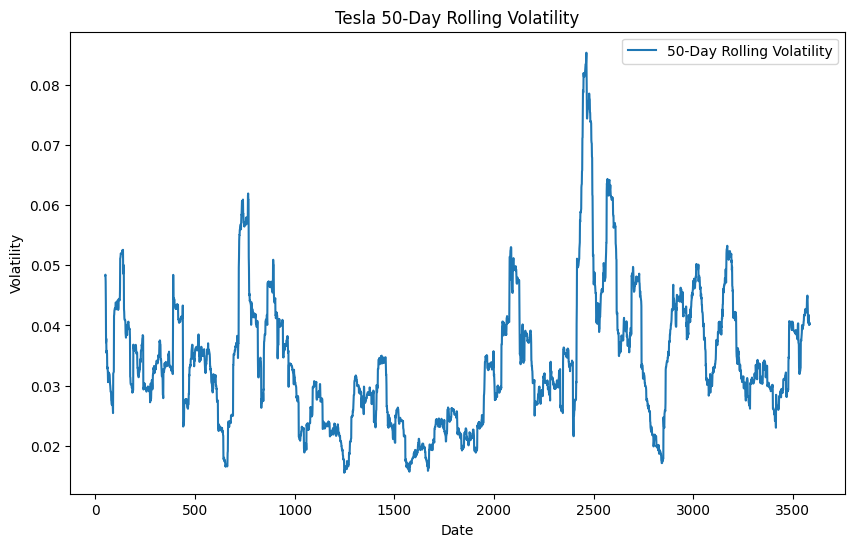

In [40]:
tesla_data['Volatility'] = tesla_data['Daily_Returns'].rolling(window=50).std()

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Volatility'], label='50-Day Rolling Volatility')
plt.title('Tesla 50-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### Seasonality and Trends

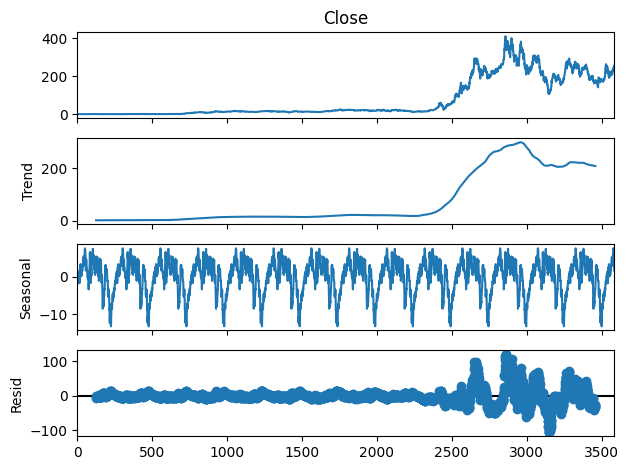

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(tesla_data['Close'], model='additive', period=252)  # Assuming daily data with 252 trading days a year
decomposition.plot()
plt.show()

## Autocorrelation and Partial Autocorrelation
### how the stock price is correlated with its past values (lag). This helps in determining how much past values influence future stock prices.

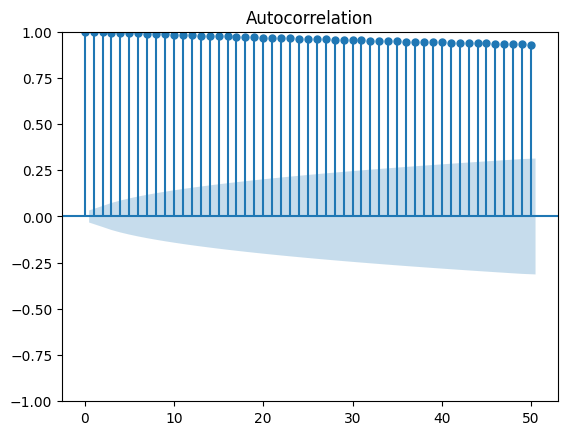

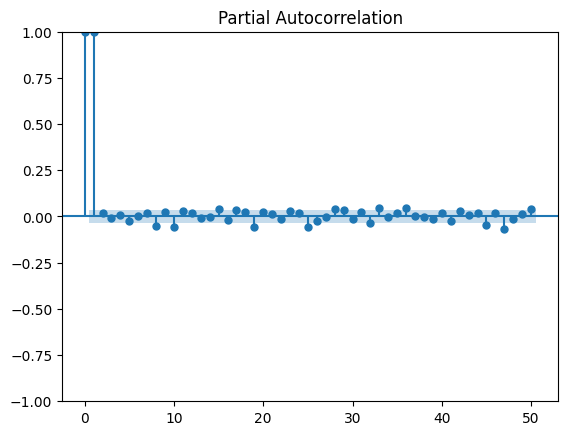

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tesla_data['Close'].dropna(), lags=50)
plt.show()

plot_pacf(tesla_data['Close'].dropna(), lags=50)
plt.show()


### Stationarity Test (Dickey-Fuller Test)

In [43]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tesla_data['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.9760945918677523
p-value: 0.7618831011597358


### Make the Series Stationary

In [45]:
# First-order differencing
tesla_data['Differenced_Close'] = tesla_data['Close'].diff()

# Drop any rows with NaN values caused by differencing
tesla_data.dropna(inplace=True)

# Check if the 'Differenced_Close' column is created properly
print(tesla_data.head())  # Ensure 'Differenced_Close' is a column in the DataFrame


           Date      Open      High       Low     Close  Adj Close    Volume  \
200  2011-04-13  1.675333  1.712667  1.654000  1.662000   1.662000  18172500   
201  2011-04-14  1.658000  1.685333  1.613333  1.676000   1.676000  14751000   
202  2011-04-15  1.710000  1.745333  1.694000  1.705333   1.705333  14152500   
203  2011-04-18  1.675333  1.708000  1.624000  1.668667   1.668667  15508500   
204  2011-04-19  1.684000  1.684000  1.643333  1.677333   1.677333   8230500   

       SMA_50        RSI  BB_upper  BB_middle  BB_lower     50_MA    200_MA  \
200  1.598653  50.769372  1.880751   1.636233  1.391716  1.598653  1.582103   
201  1.600253  51.922269  1.883150   1.644000  1.404850  1.600253  1.582540   
202  1.602853  54.335217  1.887406   1.652733  1.418061  1.602853  1.583747   
203  1.604947  50.896591  1.886477   1.660400  1.434323  1.604947  1.585690   
204  1.607733  51.675016  1.880584   1.670300  1.460016  1.607733  1.588707   

     Daily_Returns  Volatility  Differenced_

In [47]:
from statsmodels.tsa.stattools import adfuller

# Re-run the ADF test on the differenced series
result = adfuller(tesla_data['Differenced_Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')




ADF Statistic: -11.102713115087964
p-value: 3.8296533336651595e-20


In [51]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = tesla_data[['MA20', 'MA50', 'RSI', 'MACD', 'Signal Line']]
target = tesla_data['Close']

# Drop rows with NaN values created by rolling window functions
features = features.dropna()
target = target[features.index]

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [52]:
# Save the train and test datasets to CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

In [53]:
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

## Model Training

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pickle

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store the model performance
model_performance = {}

# Train each model and calculate the performance metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance metrics
    model_performance[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Display the performance of each model
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")


Linear Regression:
  MSE: 9.488994943251802
  RMSE: 3.0804212282173036
  MAE: 1.6821526005235792
  R² Score: 0.9991658575116121
Ridge Regression:
  MSE: 9.487434280617265
  RMSE: 3.080167898121345
  MAE: 1.6830702646954974
  R² Score: 0.9991659947036985
Lasso Regression:
  MSE: 12.020928232875464
  RMSE: 3.467121029453034
  MAE: 2.1113286743607973
  R² Score: 0.998943284610344
Random Forest:
  MSE: 12.197127882589829
  RMSE: 3.492438672702762
  MAE: 1.3754763984989498
  R² Score: 0.9989277955501069
Gradient Boosting:
  MSE: 12.2630796372918
  RMSE: 3.501868021112703
  MAE: 1.7393647990044903
  R² Score: 0.9989219979750097
SVR:
  MSE: 444.64106571652235
  RMSE: 21.086513835068192
  MAE: 8.284964725430426
  R² Score: 0.9609132466384166
XGBoost:
  MSE: 8.277086414864522
  RMSE: 2.876992599028458
  MAE: 1.2909974967410223
  R² Score: 0.999272391912949
K-Nearest Neighbors:
  MSE: 16.02735007926291
  RMSE: 4.003417300165311
  MAE: 1.7050426730614696
  R² Score: 0.9985910948675458
